In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') # For plots

In [125]:
df = pd.read_csv(r'C:\Users\V0V01S7\Downloads\maherabo42@gmail.com.csv')

In [126]:
df.head()

,ACTV_START_TS,ACTV_DUR_MIN_QTY
0,2022-05-01T06:36:08.567000,127.38
1,2022-05-01T12:15:39.972000,1.13
2,2022-05-01T12:16:47.924000,22.48
3,2022-05-01T14:17:06.361000,142.78
4,2022-05-01T08:43:31.069000,69.08


In [127]:
df['ACTV_START_TS'] = pd.to_datetime(df['ACTV_START_TS'])
df['dayhour'] = df["ACTV_START_TS"].apply(lambda x: x.replace(minute=0, second=0, microsecond=0))
time_line = pd.date_range(df["dayhour"].min(),df["dayhour"].max(),freq='H')
time_line = time_line.to_series()
#df = df.drop(columns=["timeslot"])
df

,ACTV_START_TS,ACTV_DUR_MIN_QTY,dayhour
0,2022-05-01 06:36:08.567,127.38,2022-05-01 06:00:00
1,2022-05-01 12:15:39.972,1.13,2022-05-01 12:00:00
2,2022-05-01 12:16:47.924,22.48,2022-05-01 12:00:00
3,2022-05-01 14:17:06.361,142.78,2022-05-01 14:00:00
4,2022-05-01 08:43:31.069,69.08,2022-05-01 08:00:00
...,...,...,...
4386,2022-04-12 10:03:38.656,77.17,2022-04-12 10:00:00
4387,2022-04-12 06:50:34.819,73.20,2022-04-12 06:00:00
4388,2022-04-12 03:52:24.625,10.28,2022-04-12 03:00:00
4389,2022-04-12 04:02:41.037,55.83,2022-04-12 04:00:00


In [128]:
ts = pd.DataFrame(time_line,columns = ["dayhour"])
ts = ts.set_index("dayhour")
ts.head()

""
dayhour
2021-05-05 04:00:00
2021-05-05 05:00:00
2021-05-05 06:00:00
2021-05-05 07:00:00
2021-05-05 08:00:00


In [129]:
ts = pd.merge(ts,df,how="left",on=["dayhour"])
ts = ts.drop_duplicates("dayhour")
ts = ts.reset_index(drop=True)

In [130]:
ts["ACTV_DUR_MIN_QTY"] = ts["ACTV_DUR_MIN_QTY"].fillna(0)
ts.head()

,dayhour,ACTV_START_TS,ACTV_DUR_MIN_QTY
0,2021-05-05 04:00:00,2021-05-05 04:50:44.354,36.25
1,2021-05-05 05:00:00,NaT,0.00
2,2021-05-05 06:00:00,NaT,0.00
3,2021-05-05 07:00:00,NaT,0.00
4,2021-05-05 08:00:00,NaT,0.00


In [131]:
for i in range(len(ts)-1):
    if ts["ACTV_DUR_MIN_QTY"][i] > (ts["dayhour"][i+1]-ts["ACTV_START_TS"][i]).total_seconds()/60:
        temp = ((ts["dayhour"][i+1]-ts["ACTV_START_TS"][i]).total_seconds())/60
        ts["ACTV_DUR_MIN_QTY"][i+1] = ts["ACTV_DUR_MIN_QTY"][i]-temp
        ts["ACTV_DUR_MIN_QTY"][i] = temp
        ts["ACTV_START_TS"][i+1] = ts["dayhour"][i+1]

ts.head()

C:\Users\V0V01S7\AppData\Local\Temp\ipykernel_19328\2336054197.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts["ACTV_DUR_MIN_QTY"][i+1] = ts["ACTV_DUR_MIN_QTY"][i]-temp
C:\Users\V0V01S7\AppData\Local\Temp\ipykernel_19328\2336054197.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts["ACTV_DUR_MIN_QTY"][i] = temp
C:\Users\V0V01S7\AppData\Local\Temp\ipykernel_19328\2336054197.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

,dayhour,ACTV_START_TS,ACTV_DUR_MIN_QTY
0,2021-05-05 04:00:00,2021-05-05 04:50:44.354,9.260767
1,2021-05-05 05:00:00,2021-05-05 05:00:00.000,26.989233
2,2021-05-05 06:00:00,NaT,0.000000
3,2021-05-05 07:00:00,NaT,0.000000
4,2021-05-05 08:00:00,NaT,0.000000


In [132]:
ts = ts.drop(columns="ACTV_START_TS")
ts = ts.set_index("dayhour")
ts.tail()

,ACTV_DUR_MIN_QTY
dayhour,
2022-06-28 07:00:00,11.60000
2022-06-28 08:00:00,17.55000
2022-06-28 09:00:00,36.45475
2022-06-28 10:00:00,10.24525
2022-06-28 11:00:00,236.35000


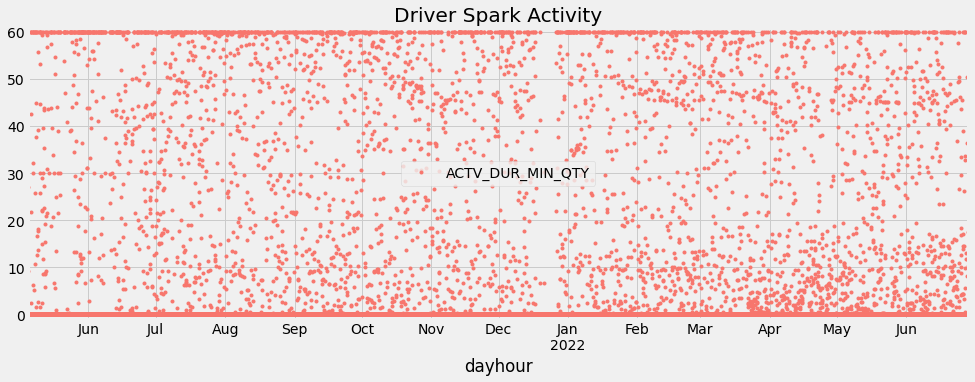

In [144]:
color_pal = ["#F8766D", "#D39200", "#93AA00",
             "#00BA38", "#00C19F", "#00B9E3",
             "#619CFF", "#DB72FB"]
ts.plot(style='.', figsize=(15,5), color=color_pal[0], title='Driver Spark Activity')
plt.ylim(-1,61)
plt.show()

In [175]:
ts.loc[ts['ACTV_DUR_MIN_QTY'] > 60]

,ACTV_DUR_MIN_QTY
dayhour,
2022-06-28 11:00:00,236.35


In [147]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index.
    """
    df = df.copy()
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

X, y = create_features(ts, label='ACTV_DUR_MIN_QTY')

features_and_target = pd.concat([X, y], axis=1)

C:\Users\V0V01S7\AppData\Local\Temp\ipykernel_19328\528181612.py:14: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['date'].dt.weekofyear


In [148]:
features_and_target.head()

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,ACTV_DUR_MIN_QTY
dayhour,,,,,,,,,
2021-05-05 04:00:00,4,2,2,5,2021,125,5,18,9.260767
2021-05-05 05:00:00,5,2,2,5,2021,125,5,18,26.989233
2021-05-05 06:00:00,6,2,2,5,2021,125,5,18,0.000000
2021-05-05 07:00:00,7,2,2,5,2021,125,5,18,0.000000
2021-05-05 08:00:00,8,2,2,5,2021,125,5,18,0.000000


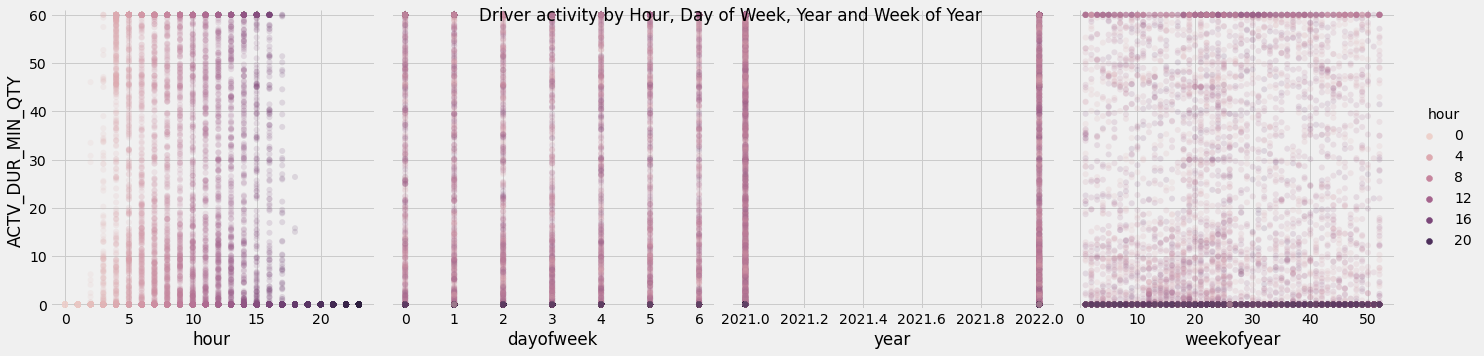

In [153]:
g = sns.pairplot(features_and_target,
             hue='hour',
             x_vars=['hour','dayofweek',
                     'year','weekofyear'],
             y_vars='ACTV_DUR_MIN_QTY',
             height=5,
             plot_kws={'alpha':0.15, 'linewidth':0}
            )
plt.ylim(-1,61)
plt.suptitle('Driver activity by Hour, Day of Week, Year and Week of Year')
plt.show()

In [154]:
split_date = '01-Feb-2022'
ts_train = ts.loc[ts.index <= split_date].copy()
ts_test = ts.loc[ts.index > split_date].copy()

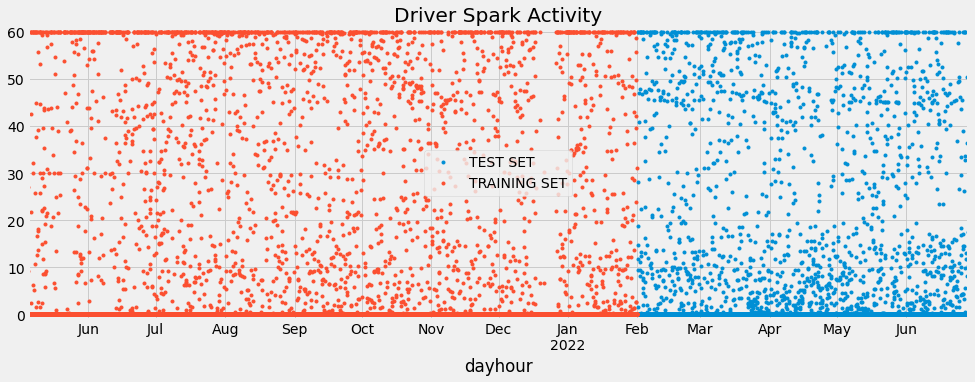

In [156]:
# Plot train and test so you can see where we have split
ts_test \
    .rename(columns={'ACTV_DUR_MIN_QTY': 'TEST SET'}) \
    .join(ts_train.rename(columns={'ACTV_DUR_MIN_QTY': 'TRAINING SET'}),
          how='outer') \
    .plot(figsize=(15,5), title='Driver Spark Activity', style='.')
plt.ylim(-1,61)
plt.show()

In [163]:
# Format data for prophet model using ds and y
ts_train.reset_index() \
    .rename(columns={'dayhour':'ds',
                     'ACTV_DUR_MIN_QTY':'y'}).head()


,ds,y
0,2021-05-05 04:00:00,9.260767
1,2021-05-05 05:00:00,26.989233
2,2021-05-05 06:00:00,0.000000
3,2021-05-05 07:00:00,0.000000
4,2021-05-05 08:00:00,0.000000


In [165]:
# Setup and train model and fit
model = Prophet()
model.fit(ts_train.reset_index() \
              .rename(columns={'dayhour':'ds',
                               'ACTV_DUR_MIN_QTY':'y'}))

INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [1] done processing


In [166]:
# Predict on training set with model
ts_test_fcst = model.predict(df=ts_test.reset_index() \
                                   .rename(columns={'dayhour':'ds'}))

In [167]:
ts_test_fcst.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-02-01 01:00:00,11.141695,-28.086595,17.475674,11.141695,11.141695,-16.134496,-16.134496,-16.134496,-16.893497,-16.893497,-16.893497,0.759001,0.759001,0.759001,0.0,0.0,0.0,-4.992800
1,2022-02-01 02:00:00,11.140738,-22.958834,22.926236,11.140738,11.140738,-10.932674,-10.932674,-10.932674,-11.684758,-11.684758,-11.684758,0.752085,0.752085,0.752085,0.0,0.0,0.0,0.208065
2,2022-02-01 03:00:00,11.139781,-12.968991,32.507861,11.139781,11.139781,-1.098122,-1.098122,-1.098122,-1.837744,-1.837744,-1.837744,0.739623,0.739623,0.739623,0.0,0.0,0.0,10.041660
3,2022-02-01 04:00:00,11.138824,-2.876585,44.878742,11.138824,11.138824,9.121491,9.121491,9.121491,8.400003,8.400003,8.400003,0.721488,0.721488,0.721488,0.0,0.0,0.0,20.260316
4,2022-02-01 05:00:00,11.137867,3.671790,48.760900,11.137867,11.137867,15.360143,15.360143,15.360143,14.662546,14.662546,14.662546,0.697598,0.697598,0.697598,0.0,0.0,0.0,26.498011


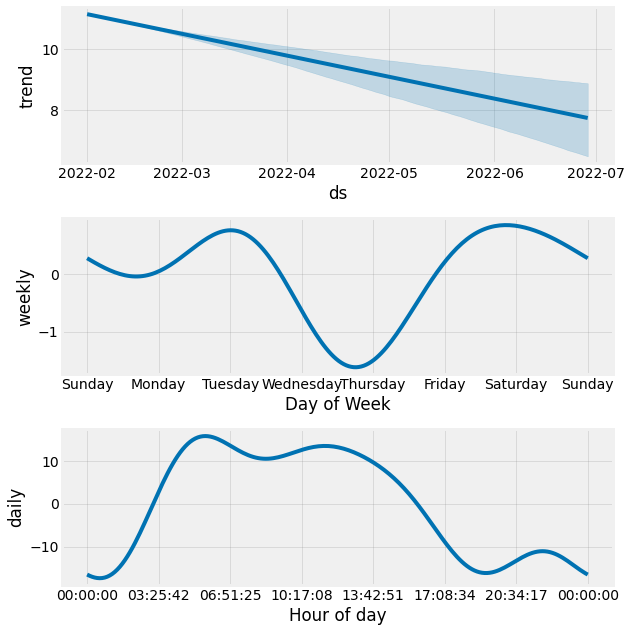

In [168]:
# Plot the components of the model
fig = model.plot_components(ts_test_fcst)

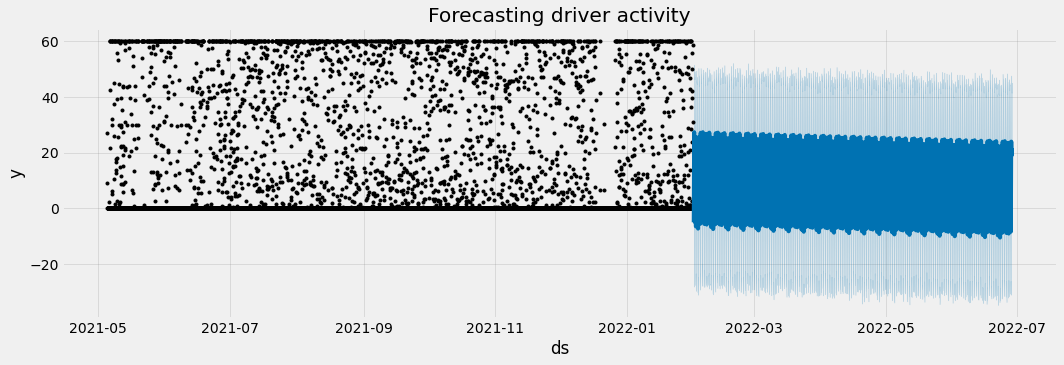

In [169]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(ts_test_fcst,
                 ax=ax)
plt.title("Forecasting driver activity")
plt.show()

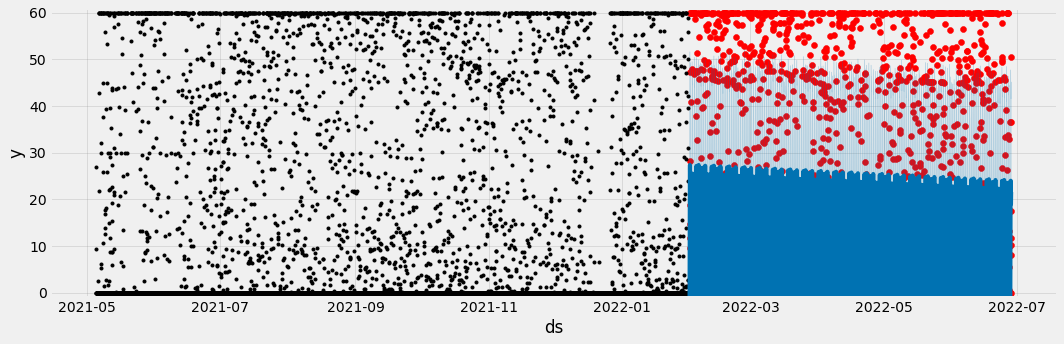

In [171]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(ts_test.index, ts_test['ACTV_DUR_MIN_QTY'], color='r')
plt.ylim(-1,61)
fig = model.plot(ts_test_fcst, ax=ax)

In [178]:
from statsmodels.tsa.stattools import adfuller
def adf_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)


In [184]:
ts = ts.drop(ts.tail(1).index)

In [185]:
adf_test(ts['ACTV_DUR_MIN_QTY'])

1. ADF :  -16.177629065284695
2. P-Value :  4.299447755182355e-29
3. Num Of Lags :  37
4. Num Of Observations Used For ADF Regression: 10025
5. Critical Values :
	 1% :  -3.4310024663545473
	 5% :  -2.8618283513957654
	 10% :  -2.5669234843091773


In [186]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(ts['ACTV_DUR_MIN_QTY'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=15.47 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=91858.804, Time=0.25 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=90730.712, Time=0.47 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=89520.466, Time=1.59 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=91856.804, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=7.36 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=6.00 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=12.13 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=89518.466, Time=0.59 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=2.02 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=inf, Time=1.72 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=90728.712, Time=0.23 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=3.83 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 51.768 seconds


In [187]:
split_date = '01-Feb-2022'
ts_train = ts.loc[ts.index <= split_date].copy()
ts_test = ts.loc[ts.index > split_date].copy()

In [189]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(ts_train['ACTV_DUR_MIN_QTY'],order=(0,1,1))
model=model.fit()
model.summary()

C:\Users\V0V01S7\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\V0V01S7\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\V0V01S7\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       ACTV_DUR_MIN_QTY   No. Observations:                 6525
Model:                 ARIMA(0, 1, 1)   Log Likelihood              -29131.575
Date:                Wed, 29 Jun 2022   AIC                          58267.150
Time:                        14:59:19   BIC                          58280.716
Sample:                    05-05-2021   HQIC                         58271.841
                         - 02-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5874      0.009    -64.220      0.000      -0.605      -0.569
sigma2       442.5723      6.866     64.462      0.000     429.116     456.029
===================================================================================
Ljung-Box (L1) (Q):                  84.00   Jarque-Bera (JB):               470.32
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                             0.57
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

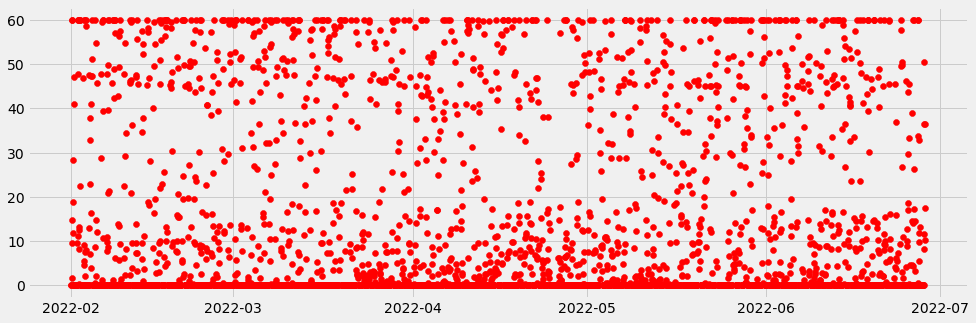

In [203]:
start=len(ts_train)
end=len(ts_train)+len(ts_test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(ts_test.index, ts_test['ACTV_DUR_MIN_QTY'], color='r')


In [198]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    #acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, #'acf1':acf1, 
            'corr':corr, 'minmax':minmax})



In [199]:
forecast_accuracy(pred, ts_test["ACTV_DUR_MIN_QTY"])

C:\Users\V0V01S7\AppData\Local\Temp\ipykernel_19328\92657301.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  mins = np.amin(np.hstack([forecast[:,None],
C:\Users\V0V01S7\AppData\Local\Temp\ipykernel_19328\92657301.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
C:\Users\V0V01S7\AppData\Local\Temp\ipykernel_19328\92657301.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  maxs = np.amax(np.hstack([forecast[:,None],
C:\Users\V0V01S7\AppData\Local\Temp\ipykernel_19328\92657301.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj

{'mape': inf,
 'me': -12.2659238105691,
 'mae': 12.455474247859472,
 'mpe': inf,
 'rmse': 23.53787445469758,
 'corr': -3.9188113053480254e-16,
 'minmax': 0.9805155499584037}

<AxesSubplot:xlabel='dayhour'>

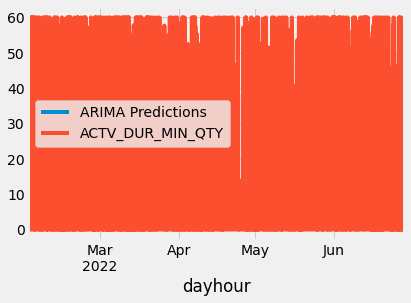

In [209]:
start=len(ts_train)
end=len(ts_train)+len(ts_test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
ts_test['ACTV_DUR_MIN_QTY'].plot(legend=True)

In [2]:
def getdata(df):
    df['ACTV_START_TS'] = pd.to_datetime(df['ACTV_START_TS'])
    df['dayhour'] = df["ACTV_START_TS"].apply(lambda x: x.replace(minute=0, second=0, microsecond=0))
    time_line = pd.date_range(df["dayhour"].min(),df["dayhour"].max(),freq='H')
    time_line = time_line.to_series()
    ts = pd.DataFrame(time_line,columns = ["dayhour"])
    ts = ts.set_index("dayhour")
    ts = pd.merge(ts,df,how="left",on=["dayhour"])
    ts = ts.drop_duplicates("dayhour")
    ts = ts.reset_index(drop=True)
    ts["ACTV_DUR_MIN_QTY"] = ts["ACTV_DUR_MIN_QTY"].fillna(0)
    for i in range(len(ts)-1):
        if ts["ACTV_DUR_MIN_QTY"][i] > (ts["dayhour"][i+1]-ts["ACTV_START_TS"][i]).total_seconds()/60:
            temp = ((ts["dayhour"][i+1]-ts["ACTV_START_TS"][i]).total_seconds())/60
            ts["ACTV_DUR_MIN_QTY"][i+1] = ts["ACTV_DUR_MIN_QTY"][i]-temp
            ts["ACTV_DUR_MIN_QTY"][i] = temp
            ts["ACTV_START_TS"][i+1] = ts["dayhour"][i+1]
            
    ts = ts.drop(columns="ACTV_START_TS")
    ts = ts.set_index("dayhour")
    ts = ts.drop(ts.tail(1).index)
    return ts